In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df1 = pd.read_csv("train.csv")

In [ ]:
df2 = pd.read_csv("test.csv")

In [ ]:
df1 = df1.drop(["Loan_ID"], axis=1)
df2 = df2.drop(["Loan_ID"], axis=1)

In [ ]:
df1["Loan_Status"] = (df1["Loan_Status"]=="Y").astype(int)

In [ ]:
df1['No'] = 1 - df1['Loan_Status']

In [ ]:
df1.Gender.fillna("Male",inplace=True)

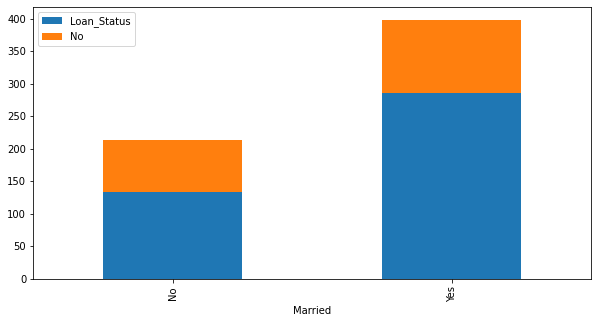

In [ ]:
df1.groupby('Married').agg('sum')[['Loan_Status', 'No']].plot(kind='bar',
                                                           figsize=(10, 5),
                                                           stacked=True)

In [ ]:
df1.Married.fillna("Yes",inplace=True)

In [ ]:
df2.Gender.fillna("Male",inplace=True)

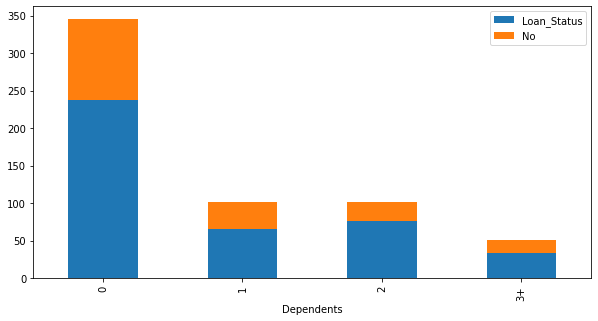

In [ ]:
df1.groupby('Dependents').agg('sum')[['Loan_Status', 'No']].plot(kind='bar',
                                                           figsize=(10, 5),
                                                           stacked=True)

In [ ]:
df1.Dependents.fillna(0,inplace=True)

In [ ]:
df1['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
0      15
Name: Dependents, dtype: int64

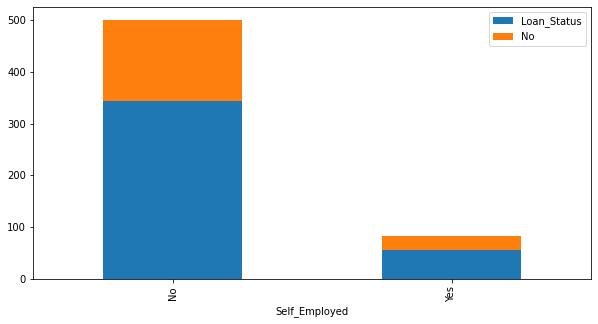

In [ ]:
df1.groupby('Self_Employed').agg('sum')[['Loan_Status', 'No']].plot(kind='bar',
                                                           figsize=(10, 5),
                                                           stacked=True)

In [ ]:
df1['Dependents'].replace('3+',3,inplace=True)
df1['Dependents'].replace('0',0,inplace=True)
df1['Dependents'].replace('1',1,inplace=True)
df1['Dependents'].replace('2',2,inplace=True)
df1['Dependents'].value_counts()

0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64

In [ ]:
df1['Self_Employed'].fillna('No',inplace=True)
df1['LoanAmount'].fillna((df1['LoanAmount'].mean()),inplace=True)
df1['Loan_Amount_Term'].fillna(84,inplace=True)
df1['Credit_History'].fillna(1.0,inplace=True)

In [ ]:
df1 = df1.drop(["No"], axis=1)

<Figure size 720x288 with 0 Axes>

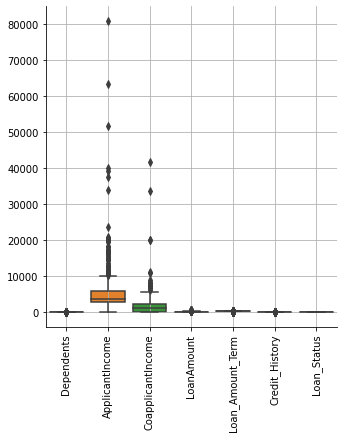

In [ ]:
plt.figure(figsize=(10,4))
sns.catplot(data=df1,kind='box')
plt.xticks(rotation=90)
plt.grid()
plt.show()

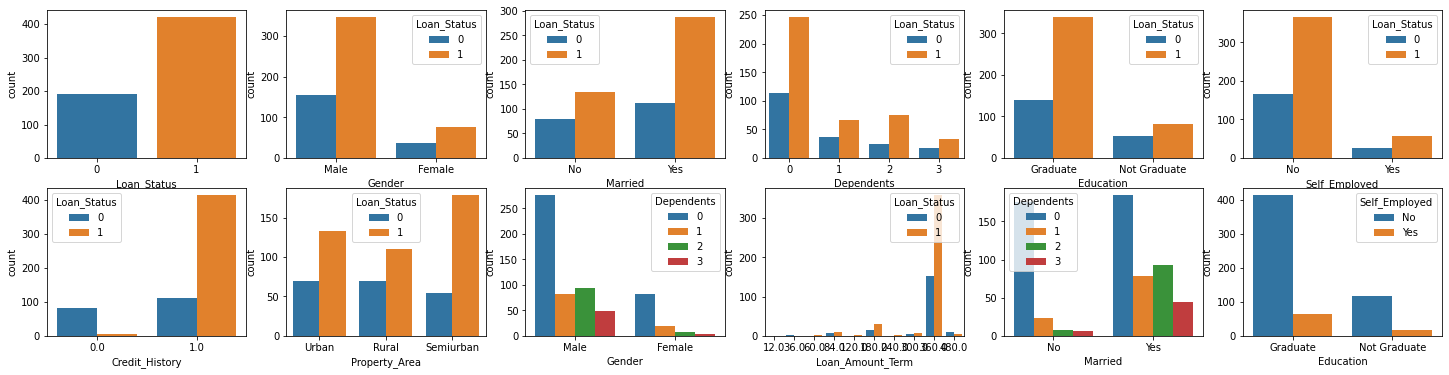

In [ ]:
fig, axs = plt.subplots(figsize=(25,6),ncols=6,nrows=2)
sns.countplot(x=df1['Loan_Status'],ax=axs[0,0])
sns.countplot(x=df1['Gender'],hue=df1['Loan_Status'],ax=axs[0,1])
sns.countplot(x=df1['Married'],hue=df1['Loan_Status'],ax=axs[0,2])
sns.countplot(x=df1['Dependents'],hue=df1['Loan_Status'],ax=axs[0,3])
sns.countplot(x=df1['Education'],hue=df1['Loan_Status'],ax=axs[0,4])
sns.countplot(x=df1['Self_Employed'],hue=df1['Loan_Status'],ax=axs[0,5])
sns.countplot(x=df1['Credit_History'],hue=df1['Loan_Status'],ax=axs[1,0])
sns.countplot(x=df1['Property_Area'],hue=df1['Loan_Status'],ax=axs[1,1])
sns.countplot(x=df1['Gender'],hue=df1['Dependents'],ax=axs[1,2])
sns.countplot(x=df1['Loan_Amount_Term'],hue=df1['Loan_Status'],ax=axs[1,3])
sns.countplot(x=df1['Married'],hue=df1['Dependents'],ax=axs[1,4])
sns.countplot(x=df1['Education'],hue=df1['Self_Employed'],ax=axs[1,5])
plt.show()

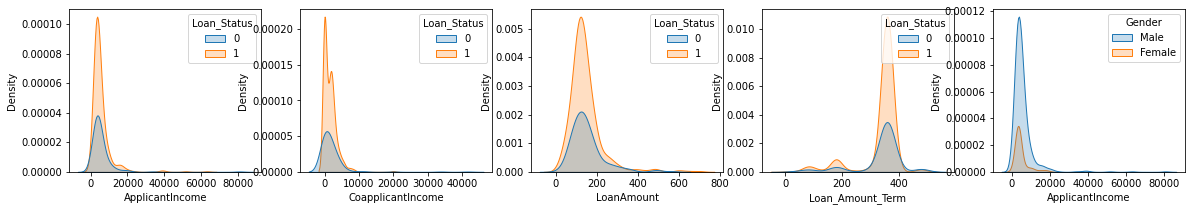

In [ ]:
fig,axs=plt.subplots(figsize=(20,3),ncols=5)
sns.kdeplot(x=df1['ApplicantIncome'],hue=df1['Loan_Status'],fill=True,ax=axs[0])
sns.kdeplot(x=df1['CoapplicantIncome'],hue=df1['Loan_Status'],fill=True,ax=axs[1])
sns.kdeplot(x=df1['LoanAmount'],hue=df1['Loan_Status'],fill=True,ax=axs[2])
sns.kdeplot(x=df1['Loan_Amount_Term'],hue=df1['Loan_Status'],fill=True,ax=axs[3])
sns.kdeplot(x=df1['ApplicantIncome'],hue=df1['Gender'],fill=True,ax=axs[4])
plt.show()

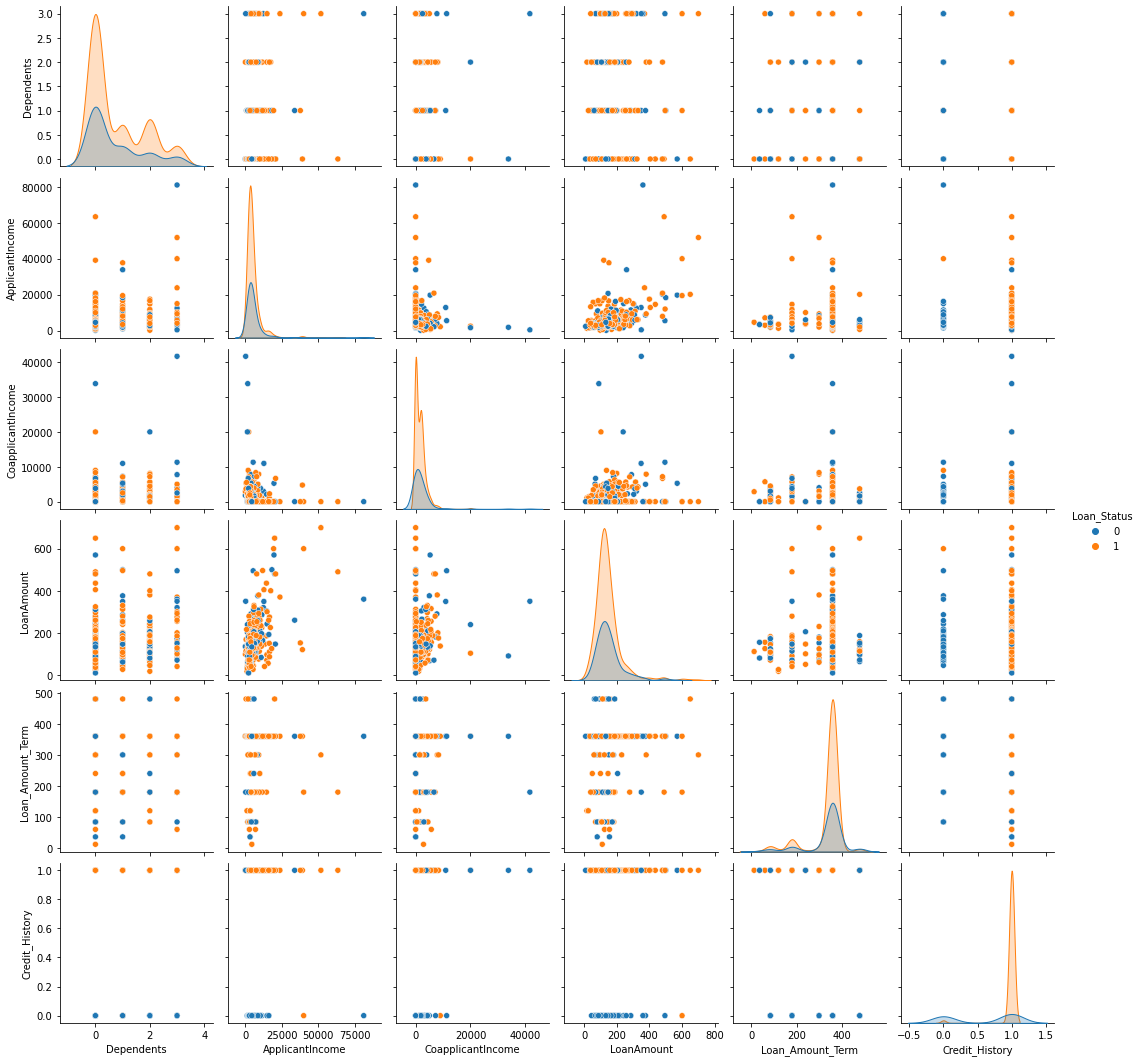

In [ ]:
sns.pairplot(df1,hue='Loan_Status')

In [ ]:
obj_col=df1.select_dtypes('object').columns
obj_col

Index(['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area'], dtype='object')

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
df1[obj_col]=oe.fit_transform(df1[obj_col])
df1.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0,0.0,0.0,5849,0.0,146.412162,360.0,1.0,2.0,1
1,1.0,1.0,1,0.0,0.0,4583,1508.0,128.000000,360.0,1.0,0.0,0
2,1.0,1.0,0,0.0,1.0,3000,0.0,66.000000,360.0,1.0,2.0,1


In [ ]:
data=df1

In [ ]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
df1.iloc[:,:-1]=ss.fit_transform(df1.iloc[:,:-1])
df1.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.072991,-0.554487,0.000000,0.318572,0.411733,1.223298,1
1,0.472343,0.728816,0.253470,-0.528362,-0.392601,-0.134412,-0.038732,-0.219273,0.318572,0.411733,-1.318513,0
2,0.472343,0.728816,-0.737806,-0.528362,2.547117,-0.393747,-0.554487,-0.957641,0.318572,0.411733,1.223298,1
3,0.472343,0.728816,-0.737806,1.892641,-0.392601,-0.462062,0.251980,-0.314547,0.318572,0.411733,1.223298,1
4,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.097728,-0.554487,-0.064454,0.318572,0.411733,1.223298,1


#Splitting dataset

In [ ]:
x=df1.iloc[:,:-1]
y=df1.iloc[:,-1]
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.072991,-0.554487,0.000000,0.318572,0.411733,1.223298
1,0.472343,0.728816,0.253470,-0.528362,-0.392601,-0.134412,-0.038732,-0.219273,0.318572,0.411733,-1.318513
2,0.472343,0.728816,-0.737806,-0.528362,2.547117,-0.393747,-0.554487,-0.957641,0.318572,0.411733,1.223298
3,0.472343,0.728816,-0.737806,1.892641,-0.392601,-0.462062,0.251980,-0.314547,0.318572,0.411733,1.223298
4,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.097728,-0.554487,-0.064454,0.318572,0.411733,1.223298


In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=4,test_size=0.35,stratify=y)

In [ ]:
def mymodel(model):
    model.fit(xtrain,ytrain)
    ypred=model.predict(xtest)
    train_accuracy=model.score(xtrain,ytrain)
    test_accuracy=model.score(xtest,ytest)
    print(str(model)[:-2],'Accuracy')
    print('Accuracy:',accuracy_score(ytest,ypred),"\nClassification Report:\n",classification_report(ytest,ypred), \
          '\nConfusion Matrix: \n', confusion_matrix(ytest,ypred))
    print(f'Training Accuracy: {train_accuracy}\nTesting Accuracy :{test_accuracy}')
    print()
    print()
    return model

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

knn=mymodel(KNeighborsClassifier())
svc=mymodel(SVC())
dt=mymodel(DecisionTreeClassifier())
lr=mymodel(LogisticRegression())
gnb=mymodel(GaussianNB())
rfc=mymodel(RandomForestClassifier(n_estimators=80,max_depth=10,min_samples_leaf=12))

KNeighborsClassifier Accuracy
Accuracy: 0.8372093023255814 
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.55      0.68        67
           1       0.83      0.97      0.89       148

    accuracy                           0.84       215
   macro avg       0.85      0.76      0.78       215
weighted avg       0.84      0.84      0.82       215
 
Confusion Matrix: 
 [[ 37  30]
 [  5 143]]
Training Accuracy: 0.8020050125313283
Testing Accuracy :0.8372093023255814


SVC Accuracy
Accuracy: 0.8372093023255814 
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.48      0.65        67
           1       0.81      1.00      0.89       148

    accuracy                           0.84       215
   macro avg       0.90      0.74      0.77       215
weighted avg       0.87      0.84      0.82       215
 
Confusion Matrix: 
 [[ 32  35]
 [  0 148]]
Training Accuracy: 0.802005012